**Hypothesis testing**

Null hypothesis(Ho)- there is no significant difference between the original logo and the given logo

Alternative Hypothesis(H1)- there is significant difference between the original logo and the given logo

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve




In [ ]:
p = Path().cwd()
q = p/"drive/MyDrive/Colab Notebooks/Brands"  # used p to create a path to the data 
target_dict = {"Fake": 0, "Original": 1}  # creating dictionary mapping to data labels to integer labels 
images = []  # create an empty list
labels = []  # create an empty list

for fldr in q.iterdir(): 
    current_label = fldr.name  # get the name of the current label
    print(current_label)
    for subfldr1 in fldr.iterdir():
        current_sublabel1 = subfldr1.name  # get the name of the current sublabel (transportation, food and beverages, electronics and fashion)
        print(current_sublabel1)
        for subfldr2 in subfldr1.iterdir():
            current_sublabel2 = subfldr2.name  # get the name of the current sublabel (fake, original)
            print(current_sublabel2)
            for img in subfldr2.iterdir():
                if img.is_file():  # check if the current item is a file
                    img = load_img(img, color_mode="grayscale")  # load image as grayscale  
                    img_array = img_to_array(img)  # convert the image to a NumPy array 
                    img_array_resized = smart_resize(img_array, (256, 256))  # resize the image to 256 by 256 
                    images.append(img_array_resized)  # add resized image to list of images 
                    labels.append(target_dict[current_sublabel2])  # add label for this image to the list of labels


Food and Beverages
7-Up
Fake
Original
Colgate
Fake
Original
Kitkat
Fake
Original
Burger King
Fake
Original
Lays
Fake
Original
Mars
Fake
Original
Aquafina
Fake
Original
Cadbury
Fake
Original
Cocacola
Fake
Original


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Fanta
Fake
Original
KFC
Fake
Original
Monster
Fake
Original
Pepsi
Fake
Original
Pizzahut
Original
Fake
Starbucks
Original
Fake
Tang
Fake
Original
Snickers
Fake
Original
Besleri
Fake
Original
Mentos
Fake
Original
Mirinda
Fake
Original
Milkybar
Original
Fake
Horlicks
Original
Fake
Corona
Original
Fake
Heineken
Original
Fake
Maggi
Original
Fake
Carlsberg
Original
Fake
Canadadry
Original
Fake
Subway
Original
Fake
McDonald's
Original
Fake
Bru
Original
Fake
Applebees
Original
Fake
TimHortons
Original
Fake
Brittania
Fake
Original
Wendy's
Original
Fake
Redbull
Fake
Original
Transportation
Hyundai
Fake
Original
Volkeswagan
Fake
Original
Volvo
Original
Fake
Tesla
Original
Fake
Ferrari
Original
Fake
Toyota
Original
Fake
Suzuki
Original
Fake
Mazda
Original
Fake
Magna
Original
Fake
Ford
Original
Fake
BMW
Original
Fake
Audi
Fake
Original
Yamaha
Original
Fake
Mercedes
Fake
Original
Electronics
Apple
Original
Fake
Nikon
Fake
Original
Samsung
Original
Fake
LG
Original
Fake
JBL
Original
Fake
Philips
Ori

In [ ]:
len(images)

12115

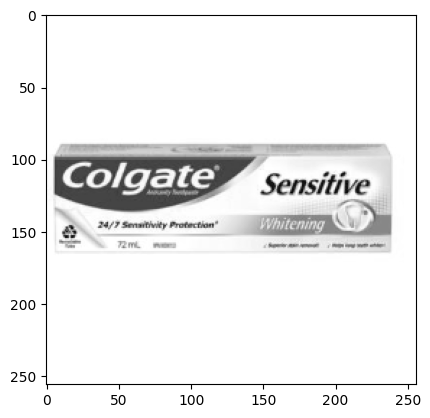

In [ ]:
plt.imshow(images[190], cmap='gray')

In [ ]:
target_dict

{'Fake': 0, 'Original': 1}

In [ ]:
print(labels[190])

1


In [ ]:

# Making 80% split for training data
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)



In [ ]:
# Converting values to numpy array
train_images = np.array(train_images)
test_images = np.array(test_images)
val_images = np.array(val_images)


In [ ]:
# Scaling values to [0,1] interval
train_images = train_images / 255
test_images = test_images/ 255
val_images = val_images / 255


In [ ]:
#shape of the image data arrays
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)


(7269, 256, 256, 1)
(2423, 256, 256, 1)
(2423, 256, 256, 1)


In [ ]:

# flatten the images to use them as features
train_features = train_images.reshape(train_images.shape[0], -1)
val_features = val_images.reshape(val_images.shape[0], -1)
test_features = test_images.reshape(test_images.shape[0], -1)


## **SVM MODEL**

In [ ]:
#import necessary libraries
from sklearn.svm import SVC


# train the SVM model
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(train_features, train_labels)


SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# evaluate the model on validation set
val_preds = svm.predict(val_features)
val_acc = accuracy_score(val_labels, val_preds)
print("Validation accuracy:", val_acc)

# evaluate the model on test set
test_preds = svm.predict(test_features)
test_acc = accuracy_score(test_labels, test_preds)
print("Test accuracy:", test_acc)


Validation accuracy: 0.8757738340899711
Test accuracy: 0.8774246801485761


In [ ]:
# calculate precision, recall, and F1 score for the predicted labels
val_precision = precision_score(val_labels, val_preds, average='weighted')
val_recall = recall_score(val_labels, val_preds, average='weighted')
val_f1 = f1_score(val_labels, val_preds, average='weighted')

# print the results
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)
print("Validation F1 score:", val_f1)


Validation precision: 0.8673974604531407
Validation recall: 0.8757738340899711
Validation F1 score: 0.869742536463856


The validation precision of 0.8673974604531407 and recall of 0.8757738340899711 means that the precision and recall are around 0.87-0.88%, which indicates that the model is able to identify positive cases (i.e., fake images) with a high degree of accuracy. The F1 score is around 0.87, which suggests that the model is able to balance precision and recall reasonably well.

In [ ]:
test_precision = precision_score(test_labels, test_preds, average='weighted')
test_recall = recall_score(test_labels, test_preds, average='weighted')
test_f1 = f1_score(test_labels, test_preds, average='weighted')
print("Test precision:", test_precision)
print("Test recall:", test_recall)
print("Test F1 score:", test_f1)


Test precision: 0.8685877164107546
Test recall: 0.8774246801485761
Test F1 score: 0.8709460520757054


test precision of 0.8685877164107546, which means that 87% of the predictions made by the model for the positive class were correct. The test recall is 0.8774246801485761, which means that 86% of the actual positive examples in the test set were correctly identified by the model. F1 score is 0.87, which indicates that the model has a good balance of precision and recall and is performing well overall.

In [ ]:
# here we calculate the confusion matrix of the model's predictions on the test set.
cm=confusion_matrix(test_labels,test_preds)
cm

array([[ 214,  195],
       [ 102, 1912]])

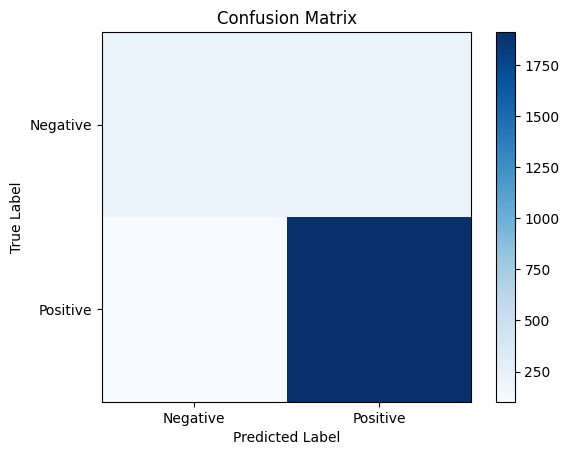

In [ ]:
# visual representation of confusion matrix of the model's predictions.
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In this case, there were 214 true negative predictions, 195 false positive predictions, 102 false negative predictions and 1912 true positive predictions.

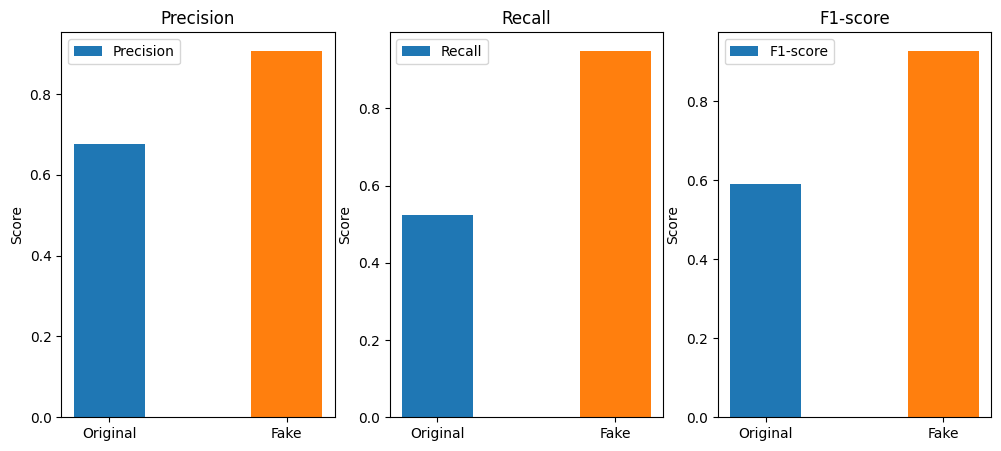

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_preds)
class_names = ['Original', 'Fake']
x = np.arange(len(class_names))
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()

The precision, recall and F1 score for fake class is higher as compared to original class.

In [ ]:
# Converting labels to categorical
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)


In [ ]:
model = Sequential()
initializer = tf.keras.initializers.HeUniform()
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same", input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.summary()
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model for 20 epochs with a batch size of 25

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(val_images, val_labels), batch_size=25, verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Evaluate the model on validation data
validation_loss, validation_acc = model.evaluate(val_images, val_labels)

# Print the test and validation accuracy
print('Test accuracy:', test_acc)
print('Validation accuracy:', validation_acc)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 128)     0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     1

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/20
291/291 [==============================] - 82s 143ms/step - loss: 0.4646 - accuracy: 0.8232 - val_loss: 0.5558 - val_accuracy: 0.7404
Epoch 2/20
291/291 [==============================] - 20s 67ms/step - loss: 0.3336 - accuracy: 0.8800 - val_loss: 0.3727 - val_accuracy: 0.8692
Epoch 3/20
291/291 [==============================] - 20s 67ms/step - loss: 0.2810 - accuracy: 0.8959 - val_loss: 0.6733 - val_accuracy: 0.7301
Epoch 4/20
291/291 [==============================] - 20s 67ms/step - loss: 0.2053 - accuracy: 0.9232 - val_loss: 0.4549 - val_accuracy: 0.8370
Epoch 5/20
291/291 [==============================] - 20s 67ms/step - loss: 0.1239 - accuracy: 0.9541 - val_loss: 0.3372 - val_accuracy: 0.9088
Epoch 6/20
291/291 [==============================] - 20s 67ms/step - loss: 0.0743 - accuracy: 0.9755 - val_loss: 0.9832 - val_accuracy: 0.7466
Epoch 7/20
291/291 [==============================] - 20s 67ms/step - loss: 0.0437 - accuracy: 0.9858 - val_loss: 0.4640 - val_accuracy

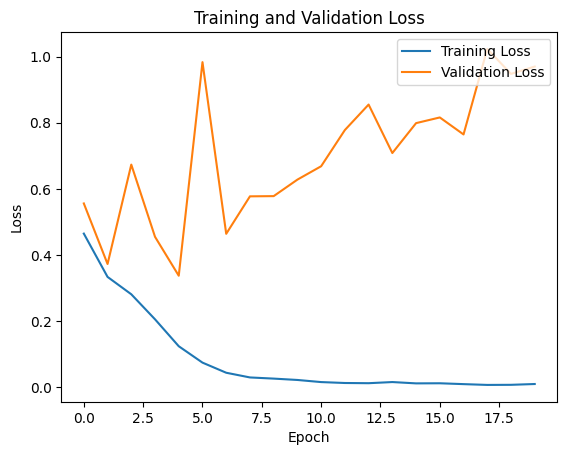

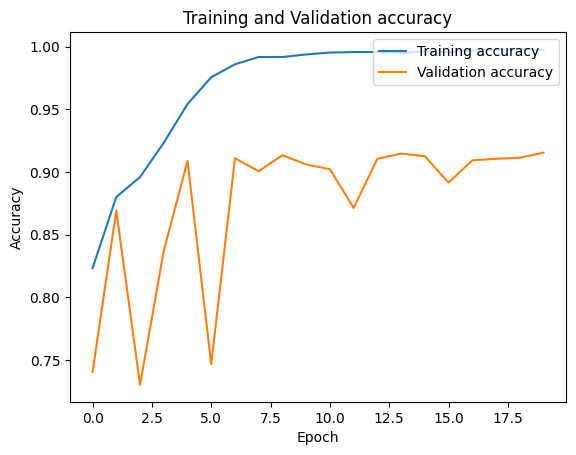

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Convert the predicted labels from one-hot encoding to integer encoding
test_pred_labels = np.argmax(model.predict(test_images), axis=1)

# Get the classification report for the test data
print(classification_report(np.argmax(test_labels, axis=1), test_pred_labels))


76/76 [==============================] - 2s 23ms/step
              precision    recall  f1-score   support

           0       0.86      0.55      0.67       409
           1       0.92      0.98      0.95      2014

    accuracy                           0.91      2423
   macro avg       0.89      0.77      0.81      2423
weighted avg       0.91      0.91      0.90      2423



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded labels back to integer labels
test_labels = np.argmax(test_labels, axis=1)

# Generate the confusion matrix
pred_label = model.predict(test_images)
cm = confusion_matrix(test_labels, np.argmax(pred_label, axis=1))

print('Confusion matrix:')
print(cm)


76/76 [==============================] - 2s 23ms/step
Confusion matrix:
[[ 226  183]
 [  37 1977]]


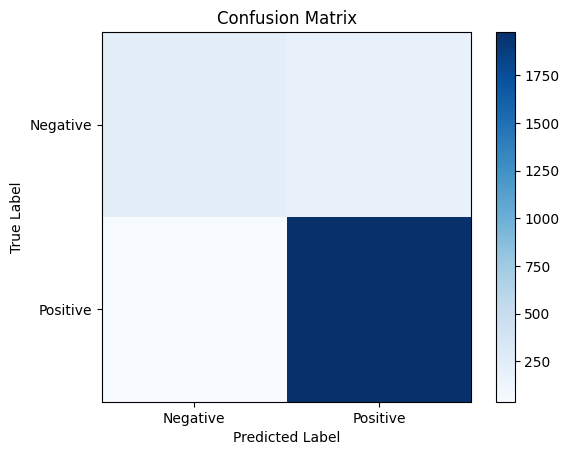

In [ ]:
# visual representation of confusion matrix of the model's predictions.
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In this case, there were 226 true negative predictions, 183 false positive predictions, 37 false negative predictions and 1977 true positive predictions.

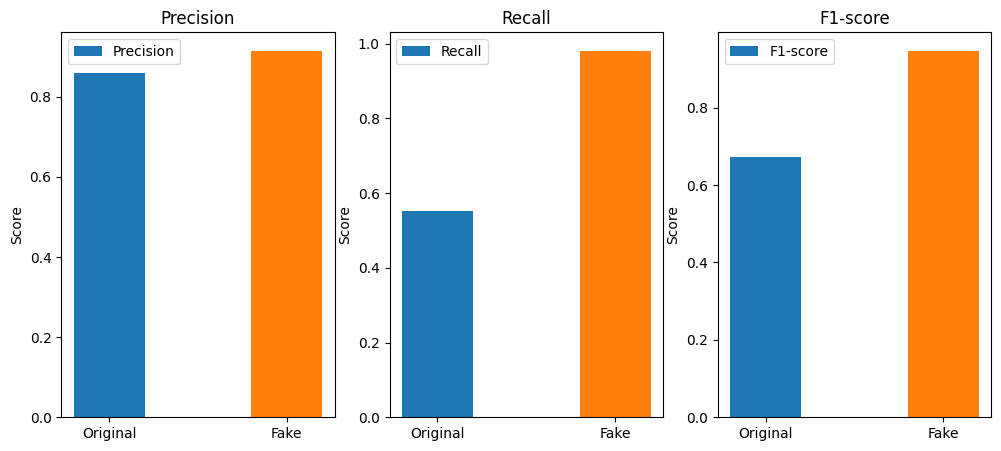

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_pred_labels)
class_names = ['Original', 'Fake']
x = np.arange(len(class_names))
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()

The precision, recall and F1 score for fake class is higher as compared to original class.